# Tratamento de dados categóricos e seu impacto na análise estatística

O tratamento de variáveis categóricas constitui uma etapa fundamental na preparação de dados para análise estatística e modelagem preditiva. Tais variáveis, por representarem atributos qualitativos de natureza nominal ou ordinal, não podem ser diretamente utilizadas por algoritmos que operam em valores numéricos. A forma como são transformadas pode influenciar de maneira significativa a qualidade dos resultados e a interpretação das análises.

Este script tem como propósito demonstrar, por meio de exemplos práticos, como o tratamento de variáveis categóricas impacta a análise estatística. Serão empregadas técnicas de visualização e transformação utilizando bibliotecas como pandas, matplotlib e seaborn, ressaltando as implicações metodológicas de cada abordagem e fornecendo subsídios para a escolha criteriosa da técnica mais apropriada em diferentes contextos analíticos.

Entre as estratégias mais utilizadas, destacam-se o **One-Hot Encoding** e o **Ordinal (Label) Encoding**. O One-Hot Encoding consiste na criação de variáveis indicadoras (dummies), atribuindo 0 ou 1 para cada categoria, preservando a ausência de relação de ordem entre elas. Essa abordagem é adequada para variáveis nominais, mas pode aumentar substancialmente a dimensionalidade dos dados. Já o Ordinal Encoding (ou Label Encoding) atribui valores inteiros às categorias de acordo com uma ordem definida, sendo útil em variáveis ordinais ou em contextos em que a relação de hierarquia entre categorias seja relevante. Entretanto, seu uso inadequado pode induzir interpretações artificiais de distância entre categorias quando estas não possuem ordem natural.

**Objetivo:** Prever o custo de entrega a partir de variáveis numéricas e categóricas,
analisando o impacto de diferentes técnicas de codificação (One-Hot Encoding e Ordinal Encoding)
na preparação dos dados e no desempenho dos modelos.

### Pacotes utilizados:

In [2]:
# Imports
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## Carrega e trata os dados

In [3]:
dados = pd.read_csv("/home/priscila/Downloads/1-Mat/dados/dataset_p5.csv")
dados.head()

,valor_venda_unitario,valor_venda_total,custo_entrega,status_entrega,idade_vendedor,area_urbana,cliente_local
0,9.50,138,11,Ruim,42,Sim,Sim
1,11.22,111,16,Bom,65,Sim,Sim
2,10.06,113,10,Medio,59,Sim,Sim
3,7.40,117,4,Medio,55,Sim,Sim
4,4.15,141,3,Ruim,38,Sim,Nao


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   valor_venda_unitario  400 non-null    float64
 1   valor_venda_total     400 non-null    int64  
 2   custo_entrega         400 non-null    int64  
 3   status_entrega        400 non-null    object 
 4   idade_vendedor        400 non-null    int64  
 5   area_urbana           400 non-null    object 
 6   cliente_local         400 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 22.0+ KB


In [4]:
dados.shape

(400, 7)

### Descrição dos dados

O conjunto de dados é composto por 400 observações e 7 variáveis, incluindo atributos numéricos e categóricos. As variáveis são:

- valor_venda_unitario (float64): preço unitário do produto vendido.
- valor_venda_total (int64): valor total da venda associada à transação.
- custo_entrega (int64): variável resposta de interesse, que representa o custo associado à entrega.
- status_entrega (object): variável categórica qualitativa que descreve a qualidade ou condição da entrega, com categorias como “Bom”, “Médio” e “Ruim”.
idade_vendedor (int64): idade do vendedor responsável pela transação.
- area_urbana (object): variável categórica binária que identifica se a venda ocorreu em área urbana (“Sim” ou “Não”).
- cliente_local (object): variável categórica binária que indica se o cliente é local (“Sim” ou “Não”).

Do total, três variáveis são numéricas (valor_venda_unitario, valor_venda_total, idade_vendedor), e três são categóricas (status_entrega, area_urbana, cliente_local), sendo o custo_entrega a variável-alvo para previsão.



## Análise Exploratória

### Para variáveis quantitativas

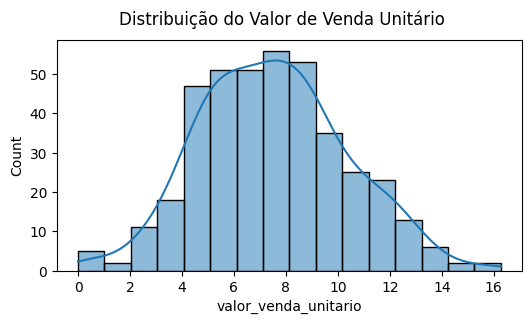

In [7]:
# Plot de valor_venda_unitario
fig, axes = plt.subplots(1, 1, figsize = (6, 3))
fig.suptitle('Distribuição do Valor de Venda Unitário')
sns.histplot(dados['valor_venda_unitario'], kde = True);

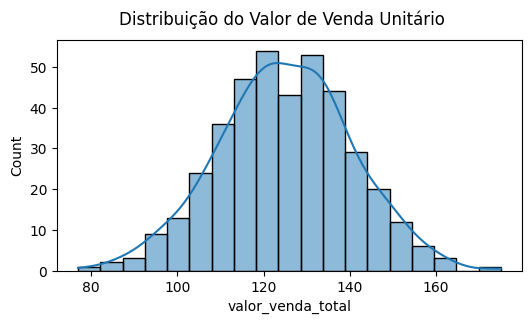

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = (6, 3))
fig.suptitle('Distribuição do Valor de Venda Total')
sns.histplot(dados['valor_venda_total'], kde = True);

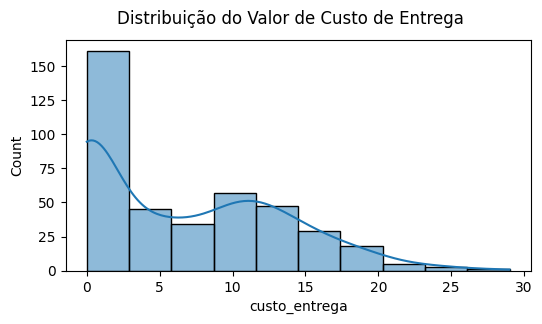

In [9]:
fig, axes = plt.subplots(1, 1, figsize = (6, 3))
fig.suptitle('Distribuição do Valor de Custo de Entrega')
sns.histplot(dados['custo_entrega'], kde = True);

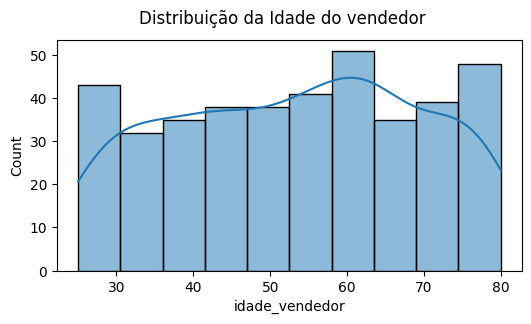

In [11]:
fig, axes = plt.subplots(1, 1, figsize = (6, 3))
fig.suptitle('Distribuição da Idade do vendedor')
sns.histplot(dados['idade_vendedor'], kde = True);

### Para variáveis qualitativas

In [13]:
sns.set_style('whitegrid')

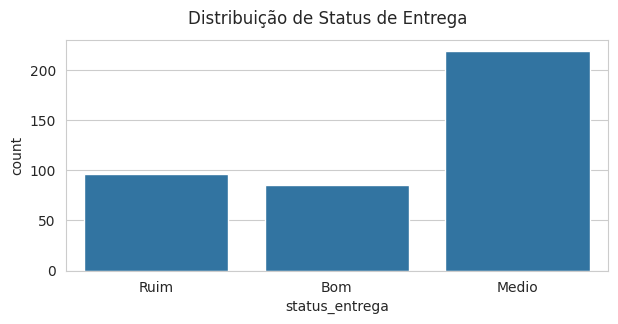

In [17]:
# Plot de status_entrega
fig, axes = plt.subplots(1, 1, figsize = (7, 3))
fig.suptitle('Distribuição de Status de Entrega')
sns.countplot(data = dados, x = 'status_entrega');

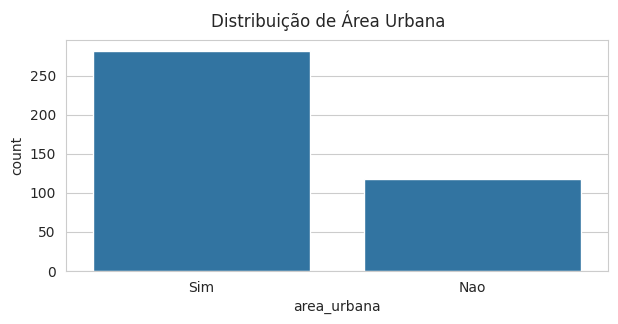

In [20]:
fig, axes = plt.subplots(1, 1, figsize = (7, 3))
fig.suptitle('Distribuição de Área Urbana')
sns.countplot(data = dados, x = 'area_urbana');

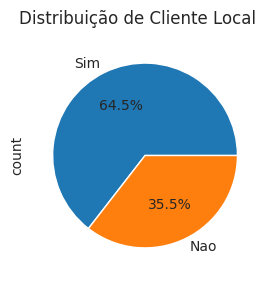

In [24]:
# Plot de cliente_local
fig, axes = plt.subplots(1, 1, figsize = (6, 3))
fig.suptitle('Distribuição de Cliente Local')
dados['cliente_local'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

## Criando Tabelas de Frequência 

In [28]:
frequencia_status_entrega =  dados['status_entrega'].value_counts()
frequencia_status_entrega

status_entrega
Medio    219
Ruim      96
Bom       85
Name: count, dtype: int64

In [31]:
dados['area_urbana'].value_counts() 


area_urbana
Sim    282
Nao    118
Name: count, dtype: int64

In [29]:
dados['cliente_local'].value_counts()

cliente_local
Sim    258
Nao    142
Name: count, dtype: int64

## Criando Tabelas de Contingência 

In [37]:
# Com duas variáveis categóricas
pd.crosstab(dados['status_entrega'], dados['area_urbana'])

area_urbana,Nao,Sim
status_entrega,,
Bom,28,57
Medio,68,151
Ruim,22,74


In [38]:
## Tabela de contigência com 3 variáveis e total
pd.crosstab(index = [dados['status_entrega'], dados['area_urbana']], 
                             columns = dados['cliente_local'],
                             margins = True, 
                             margins_name = "Total")

cliente_local               Nao  Sim  Total
status_entrega area_urbana                 
Bom            Nao            6   22     28
               Sim           18   39     57
Medio          Nao           29   39     68
               Sim           55   96    151
Ruim           Nao           11   11     22
               Sim           23   51     74
Total                       142  258    400

## Versão 1: One-Hot Encoding

Ideal para variáveis qualitativas nominais.

In [5]:
# Selecionando as variáveis independentes (X) e a dependente (y)
X = dados.drop('custo_entrega', axis = 1)
y = dados['custo_entrega']

In [6]:
# Separando variáveis categóticas e numéricas
variaveis_categoricas = X.select_dtypes(include = 'object').columns.tolist()
variaveis_numericas = X.select_dtypes(include = 'number').columns.tolist()

print('Variáveis Categóricas:', variaveis_categoricas)
print('Variáveis Numéricas:', variaveis_numericas)

Variáveis Categóricas: ['status_entrega', 'area_urbana', 'cliente_local']
Variáveis Numéricas: ['valor_venda_unitario', 'valor_venda_total', 'idade_vendedor']


In [7]:
# Cria trasnformador para variáveis categóricas
transformador_categorico = OneHotEncoder(drop = 'first')

In [8]:
### Cria transformador para variáveis numéricas
transformador_numerico = StandardScaler()

In [9]:
# Combinando os transformadores
# Pré-processamento: Codificação One-Hot para variáveis categóricas e padronização para numéricas
preprocessador_v1 = ColumnTransformer(
    transformers = [
        ('cat', transformador_categorico, variaveis_categoricas),
        ('num', transformador_numerico, variaveis_numericas)
    ])

In [10]:
# Criando o pipeline com o processamento e com o modelo
modelo_v1 = Pipeline(steps = [('preprocessor', preprocessador_v1), ('regressor', LinearRegression())])

In [11]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 29)

In [ ]:
modelo_v1.fit(X_train, y_train)

In [14]:
y_pred = modelo_v1.predict(X_test)

In [15]:
rmse_v1 = root_mean_squared_error(y_test, y_pred)
r2_v1 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse_v1:.2f}')
print(f'R²: {r2_v1:.2f}')

RMSE: 4.23
R²: 0.55


## Versão 2: Ordinal Label Encoding

Ideal para variáveis qualitativas ordinais.

In [16]:
# Separa as variáveis categóricas (nominais e ordinais)
variaveis_categoricas_nominais = ['area_urbana', 'cliente_local']
variaveis_categoricas_ordinais = ['status_entrega']

In [17]:
# TRansformador para variáveis categóricas ordinais
transformador_categorico_ordinal = OrdinalEncoder(categories = [['Ruim', 'Medio', 'Bom']])

# Trasnformador para variáveis categóricas nominais
transformador_categorico_nominal = OneHotEncoder(drop = 'first')

In [18]:
# Combinando os transformadores
preprocessor_v2 = ColumnTransformer(
    transformers = [
        ('cat_nom', transformador_categorico_nominal, variaveis_categoricas_nominais),
        ('cat_ord', transformador_categorico_ordinal, variaveis_categoricas_ordinais),
        ('num', transformador_numerico, variaveis_numericas)
    ])

In [19]:
modelo_v2 = Pipeline(steps = [('preprocessor', preprocessor_v2), ('regressor', LinearRegression())])

In [ ]:
# Fit do modelo com dados de treino
modelo_v2.fit(X_train, y_train)

In [21]:
# Previsões com dados de teste
y_pred_v2 = modelo_v2.predict(X_train)

In [23]:
# Avaliação do modelo v2
rmse_v2 = root_mean_squared_error(y_train, y_pred_v2)
r2_v2 = r2_score(y_train, y_pred_v2)

print(f'RMSE v2: {rmse_v2:.2f}')
print(f'R² v2: {r2_v2:.2f}')

RMSE v2: 4.82
R² v2: 0.49


## Comparação das versões

As diferenças nas métricas entre os dois blocos de código (versão 1 e 2 dos modelos) podem ser atribuídas principalmente à forma como as variáveis categóricas são tratadas no pré-processamento antes de ajustar o modelo de regressão linear. Vamos analisar os principais pontos que contribuem para essa diferença:

**Tratamento de Variáveis Categóricas**

Versão 1: Todas as variáveis categóricas são tratadas usando OneHotEncoder com a opção drop='first'. Este método cria variáveis dummy para cada categoria, excluindo a primeira para evitar a redundância.

Versão 2: Separa as variáveis categóricas em nominais e ordinais. As nominais continuam sendo tratadas com OneHotEncoder (também com drop='first'), enquanto as ordinais são tratadas com OrdinalEncoder. Esta abordagem mantém a ordem natural das variáveis categóricas ordinais, o que pode ser importante dependendo da relação entre a variável categórica e a variável dependente.

**Impacto no Modelo**

Representação de Dados: A principal diferença entre os blocos está na forma como as informações categóricas são representadas e inseridas no modelo. Ao tratar variáveis ordinais de maneira diferenciada, o Bloco 2 pode capturar melhor a relação ordinal inerente, o que, teoricamente, poderia levar a uma modelagem mais precisa.

Resultados: Na prática, as métricas de desempenho (RMSE e R²) do Bloco 2 são ligeiramente piores do que as do Bloco 1. Isso pode indicar que, para este conjunto específico de dados e tarefa de modelagem, a informação capturada pela codificação ordinal não compensou a complexidade adicional ou a representação simplificada que ela oferece. Outra possibilidade é que a relação entre a variável categórica ordinal e a variável dependente não seja linear ou não se beneficie da representação ordinal neste contexto específico.

**Considerações**

Escolha do Método de Codificação: A escolha entre diferentes métodos de codificação depende da natureza das variáveis categóricas e de como elas se relacionam com a variável dependente. Nem sempre a abordagem mais complexa (separando nominais de ordinais) resulta em melhor desempenho do modelo.

## Interpretando a Relação das Variáveis Preditoras com a Variável Alvo

In [28]:
# Para extrair os coeficientes, precisamos acessar o regressor dentro do pipeline...
model_regressor = modelo_v1.named_steps['regressor']

In [33]:
# e também tratar a transformação One-Hot para obter os nomes das variáveis
atrib_cat = modelo_v1.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(variaveis_categoricas)
atrib_cat

array(['status_entrega_Medio', 'status_entrega_Ruim', 'area_urbana_Sim',
       'cliente_local_Sim'], dtype=object)

In [35]:
# Combinando os nomes das variáveis numéricas e categóricas transformadas
nomes_todos_atributos = variaveis_numericas + list(atrib_cat)

nomes_todos_atributos

['valor_venda_unitario',
 'valor_venda_total',
 'idade_vendedor',
 'status_entrega_Medio',
 'status_entrega_Ruim',
 'area_urbana_Sim',
 'cliente_local_Sim']

In [36]:
# Coeficientes do modelo
coeficientes = model_regressor.coef_

In [39]:
# Criando um DataFrame para melhor visualização
coef_df = pd.DataFrame({'Atributo': nomes_todos_atributos, 'Coeficiente': coeficientes})
coef_df

,Atributo,Coeficiente
0,valor_venda_unitario,1.572001
1,valor_venda_total,1.711463
2,idade_vendedor,0.213349
3,status_entrega_Medio,8.848048
4,status_entrega_Ruim,1.678592
5,area_urbana_Sim,-0.185015
6,cliente_local_Sim,0.269747


In [40]:
# Ordenando os coeficientes por magnitude (valor absoluto)
coef_df = coef_df.reindex(coef_df.Coeficiente.abs().sort_values(ascending = False).index)

coef_df

,Atributo,Coeficiente
3,status_entrega_Medio,8.848048
1,valor_venda_total,1.711463
4,status_entrega_Ruim,1.678592
0,valor_venda_unitario,1.572001
6,cliente_local_Sim,0.269747
2,idade_vendedor,0.213349
5,area_urbana_Sim,-0.185015
